In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
%matplotlib inline

In [16]:
# clean all files to text files
def maketxt(folder):
    """To run this simply have $maketxt(<name of folder with data files in it>)"""
    #lists all the paths in a folder
    listdir=os.listdir(folder) 
    #count of how many files were modified for visual confirmation
    count=0
    #loop over all paths in folder
    for path in listdir:
        # if the file has no .txt extension but is a file (not a folder)
        if not path.endswith(".txt") and os.path.isfile(os.path.join(folder,path)):
            print("adding .txt to : ",path)
            #renames the file to the same name with .txt
            os.rename(os.path.join(folder,path),os.path.join(folder,path+".txt"))
            count+=1
    print(count,"files textified")

def npcombinesweep(path1,path2):
    """This function takes two files (where the order is important) and combines them so that
    the data in path1 is followed by the data in path2 and the first half of file 1 is made -ve Voltage
    while the second half of path2 data is made -ve voltage. 
    This assumes that the sweep was done -ve to +ve and back"""
    # loads the data in path1 to an array
    data1=np.genfromtxt(path1,skip_header=1)
    # multiplies the first half of the first collumn by -1
    mult1=[  [-1,1]  if x<len(data1)/2 else [1,1] for x in range(len(data1))]
    
    # loads the data in path2 to an array
    data2=np.genfromtxt(path2,skip_header=1)
    # multiplies the second half of the first collumn by -1
    mult2=[  [-1,1]  if x>len(data2)/2 else [1,1] for x in range(len(data2))]
    
    #stacks the 2 data arrays 1 on top of the other
    data=np.concatenate((data2*mult1,data1*mult2),axis=0)
    #saves the array with Vg and Ids as headers seperated by a tab in a tab delimited format
    np.savetxt(os.path.splitext(path1)[0][:-2]+".txt",data,delimiter='\t',header="Vg\tIds",comments='')
     
    os.path.splitext(path1)[0][:-2]+".txt"
    #removes the origional files
    os.remove(path1)
    os.remove(path2)

def checkduplicates(folder):
    """checks for 2 part files in the directory and combines them in a 1 then 2 format.
    files should be named ABC_runXX-1.txt and ABC_runXX-2.txt where ABC and XX must be the same in both parts of the data
    but can be any arbitrary strings."""
    #gets a list of all the paths in the target folder
    listdir=os.listdir(folder)       
    count=0
    # iterates over paths inf 
    for path in listdir:
        combine=[]
        #this conditional ensures that only 2 part files will be processed by ensuring that there must be
        #a "-" after "run" in the filename indicating multiple parts
        if path[path.find("run"):].find('-')!=-1: #might take some work to replicate
            for path2 in listdir:        
                if path[:-5] in path2 and path!=path2:
                    #ensures that the files are appended in the correct order
                    if path[-5:-4]>path2[-5:-4]:
                        combine=[os.path.join(folder,path),os.path.join(folder,path2)]
                    else:
                        combine=[os.path.join(folder,path2),os.path.join(folder,path)]
                    npcombinesweep(combine[0],combine[1])
                    print(combine)
                    count+=1
                    listdir.remove(path)
                    listdir.remove(path2)
    print(count,"file pairs combined")

def plotsweepsback(ax,paths,title):
    for path in paths:
        
        data=np.genfromtxt(path,skip_header=1)
        ax.plot(data[:,0],data[:,1],".-",label="$\pm$"+path[37:37+path[37:].find('u')]+"Vg")
    ax.set_xlabel("Vg (Volts)",fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()    
    
def plotsweepstop(ax,paths,title,labels="",colors='',xlabel="Vg (Volts)"):
    for path in paths:   
        data=np.genfromtxt(path,skip_header=1)
        if type(labels)!=list:
            ax.plot(data[:,0],data[:,1],".-",label=path[35:35+path[35:].find('u')])
        elif len(labels)==len(paths)==len(colors):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)],color=colors[paths.index(path)])
        elif len(labels)==len(paths):
            ax.plot(data[:,0],data[:,1],".-",label=labels[paths.index(path)])
        else:
            print("Missmatch between labels and plots")
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel("Ids (Amps)",fontsize=15)
    ax.set_title(title,fontsize=15)
    ax.legend()
def axformat(ax,title="IV",xlabel="V",ylabel="I",ylimits=False): 
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel,fontsize=15)
    ax.set_title(title,fontsize=15)
    if ylimits!=False:
        ax.set_ylim(ylimits)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_size(15)
    

In [4]:
maketxt("215GT")
checkduplicates("215GT")  

0 files textified
0 file pairs combined


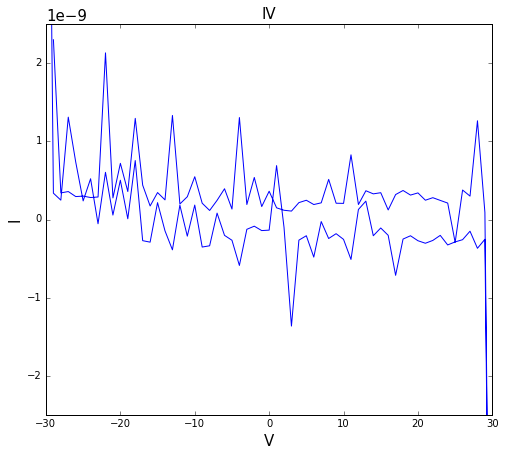

In [17]:
data=np.genfromtxt("215GT/215GT_pin01-12_VgIds_Vds5mV_Vg30updown_10K_2016-07-14_run2.txt",skip_header=1)
fig=plt.figure(figsize=(8,7))
ax1=plt.subplot(111)
ax1.plot(data[:,0],data[:,1])
axformat(ax1,ylimits=[-2.5e-9,2.5e-9])


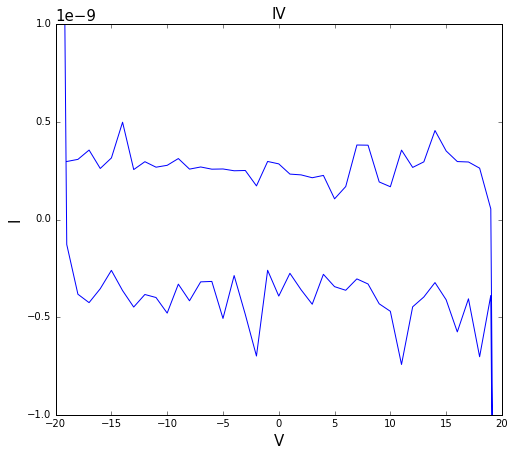

In [19]:
data=np.genfromtxt("215GT/215GT_pin01-12_IdsT_Vds5mV_Vg0_pin02-13Vtoppinch20updown_10K_2016-07-14_run6.txt",skip_header=1)
fig=plt.figure(figsize=(8,7))
ax1=plt.subplot(111)
ax1.plot(data[:,0],data[:,1])
axformat(ax1,ylimits=[-1e-9,1e-9])

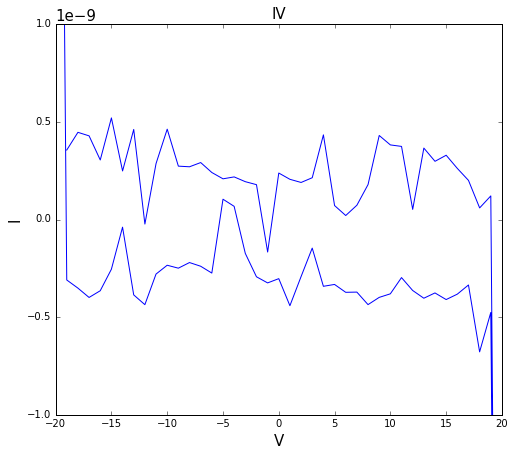

In [21]:
data=np.genfromtxt("215GT/215GT_pin01-12_IdsT_Vds5mV_Vg-10_pin02-13Vtoppinch20updown_10K_2016-07-14_run7.txt",skip_header=1)
fig=plt.figure(figsize=(8,7))
ax1=plt.subplot(111)
ax1.plot(data[:,0],data[:,1])
axformat(ax1,ylimits=[-1e-9,1e-9])